In [1]:

import pandas as pd
import matplotlib.pyplot as plt



In [4]:
cell_df = pd.read_csv("cell_phones_total.csv")
pop_df = pd.read_csv("pop.csv")

In [5]:
print("Column Names:", cell_df.columns)

Column Names: Index(['country', '1960', '1961', '1962', '1963', '1964', '1965', '1966',
       '1967', '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975',
       '1976', '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984',
       '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020',
       '2021', '2022', '2023'],
      dtype='object')


In [6]:
cell_long = cell_df.melt(id_vars=['country'], var_name='Year', value_name='Cell_Phones')
pop_long = pop_df.melt(id_vars=['country'], var_name='Year', value_name='Population')

In [7]:
cell_long['Year'] = pd.to_numeric(cell_long['Year'], errors='coerce')
cell_long['Cell_Phones'] = pd.to_numeric(cell_long['Cell_Phones'], errors='coerce')
pop_long['Year'] = pd.to_numeric(pop_long['Year'], errors='coerce')
pop_long['Population'] = pd.to_numeric(pop_long['Population'], errors='coerce')

In [8]:
merged = pd.merge(cell_long, pop_long, on=['country', 'Year'])


In [9]:
merged['Phones_Per_Person'] = merged['Cell_Phones'] / merged['Population']

In [10]:
avg_phones = merged.groupby('Year')['Phones_Per_Person'].mean().reset_index()


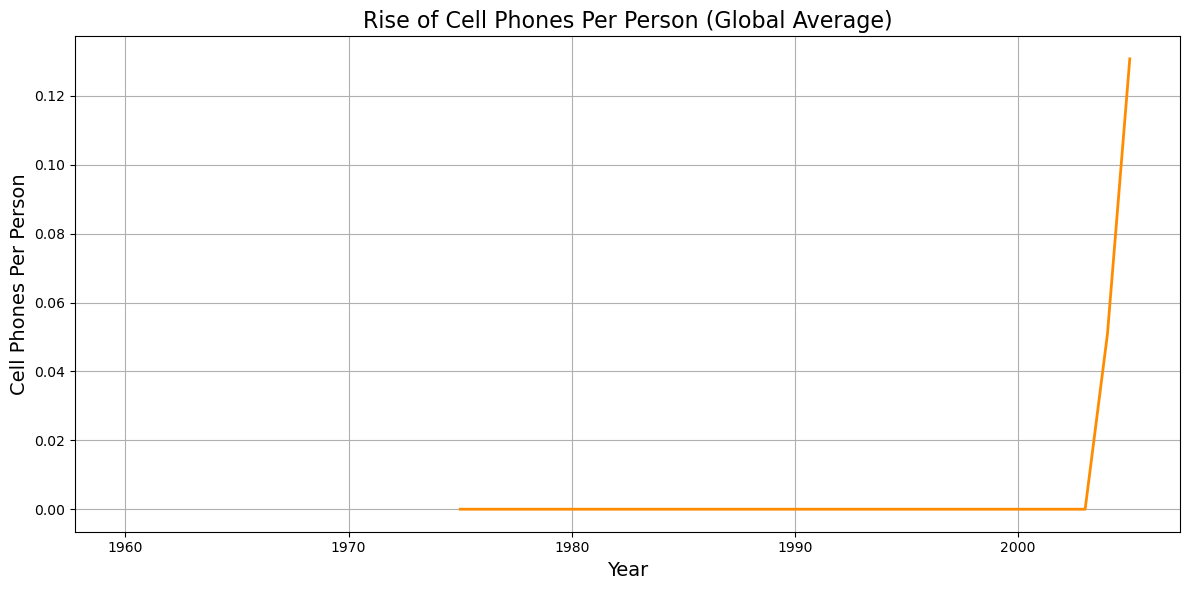

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(avg_phones['Year'], avg_phones['Phones_Per_Person'], color='darkorange', linewidth=2)
plt.title('Rise of Cell Phones Per Person (Global Average)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cell Phones Per Person', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()